Nota basada en [liga1](https://drive.google.com/file/d/1xtkxPCx05Xg4Dj7JZoQ-LusBDrtYUqOF/view?usp=sharing), [liga2](https://drive.google.com/file/d/16-_PvWNaO0Zc9x04-SRsxCRdn5fxebf2/view?usp=sharing)

# Problemas de optimización sin restricciones

En esta nota se consideran resolver problemas de la forma:

$$\min f_o(x)$$

con $f:\mathbb{R}^n \rightarrow \mathbb{R}$ convexa y $f \in \mathcal{C}^2(\text{dom}f)$.

También se asume que existe un punto óptimo $x^*$ por lo que el problema tiene solución y el valor óptimo se denota por $p^* = f(x^*) = \inf f(x)$

Por lo anterior una **condición necesaria y suficiente** para que $x^*$ sea óptimo es: $\nabla f(x^*) = 0$ que **en general** es un conjunto de $n$ **ecuaciones no lineales** en $n$ variables y que resuelve el problema de optimización planteado al inicio. 


**Ejemplos:**

1)$$\displaystyle \min_{x \in \mathbb{R}^2} x_1^4+2x_1^2x_2+x_2^2$$

Entonces:

$$
\nabla f(x) = 
\left [
\begin{array}{c}
4x_1^3+4x_1x_2\\
2x_1^2+2x_2
\end{array}
\right ]=0
$$

que es una ecuación de dos variables y dos incógnitas **no lineal**.

2) $$\displaystyle \min_{x \in \mathbb{R}^2} \frac{1}{2}x^TPx+q^Tx+r$$

con $P=\left [\begin{array}{cc}
5 & 4\\
4 & 5
\end{array}
\right ]$, $q=\left [\begin{array}{c}
-1\\
1
\end{array}
\right]
$, $r=3$. Obsérvese que haciendo las multiplicaciones de matriz-vector y productos punto se reescribe el problema como:



$$\displaystyle \min_{x \in \mathbb{R}^2} \frac{5}{2}x_1^2 + \frac{5}{2}x_2^2+4x_1x_2 -x_1 + x_2+3$$ 

Entonces:

$$\nabla f(x) = Px +q =\left [ \begin{array}{cc}
5 & 4\\
4 & 5
\end{array}
\right ]
\left [ \begin{array}{c}
x_1\\
x_2
\end{array}
\right ]
+ \left [ \begin{array}{c}
-1\\
1
\end{array}
\right ]=
\left [ \begin{array}{cc}
5x_1+4x_2-1\\
4x_1+5x_2+1
\end{array}
\right ]
=0
$$

que es una ecuación en dos variables con dos incógnitas **lineal**.

**Comentario:** en algunos casos especiales es posible resolver la ecuación no lineal $\nabla f(x) = 0$ para $x$ de forma analítica o cerrada. Este es el caso del ejemplo $2$ anterior la cual está dada por $x^* = -P^{-1}q$:

In [1]:
import numpy as np

In [2]:
P=np.array([[5,4],[4,5]])
q=np.array([-1,1])
np.linalg.solve(P,-q)

array([ 1., -1.])

pero típicamente se utiliza un algoritmo iterativo: calcular una secuencia de puntos $x^{(0)}, x^{(1)}, \dots \in \text{dom}f$ con $f(x^{(k)}) \rightarrow p^*$ si $k \rightarrow \infty$. El conjunto de puntos $x^{(0)}, x^{(1)},\dots$ se nombra **secuencia de minimización** para el problema de optimización. El algoritmo termina si $f(x^{(k)})-p^* \leq \epsilon$ con $\epsilon >0$ una tolerancia dada.

## Método de búsqueda de línea por *backtracking*

## Métodos de descenso

>Algoritmo de descenso
>> Punto inicial


## Método de máximo de descenso

## Influencia del número de condición 

## Ejemplos

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def inc_index(vec,index,h):
    '''
    Auxiliary function for gradient and Hessian computation.
    Args:
        vec (array): numpy array.
        index (int): index.
        h (float):   quantity that vec[index] will be increased.
    Returns:
        vec (array): numpy array vec with vec[index] increased by h.
    '''
    vec[index] +=h
    return vec

In [3]:
def dec_index(vec,index,h=1):
    '''
    Auxiliary function for gradient and Hessian computation.
    Args:
        vec (array): numpy array.
        index (int): index.
        h (float):   quantity that vec[index] will be decreased.
    Returns:
        vec (array): numpy array vec with vec[index] decreased by h.
    '''
    vec[index] -=h
    return vec

In [4]:
def gradient_approximation(f,x,h=1e-8):
    '''
    Numerical approximation of gradient for function f using forward differences.
    Args:
        f (lambda expression): definition of function f.
        x (array): numpy array that holds values where gradient will be computed.
        h (float): step size for forward differences, tipically h=1e-8
    Returns:
        gf (array): numerical approximation to gradient of f.
    '''
    n = x.size
    gf = np.zeros(n)
    f_x = f(x)
    for i in np.arange(n):
        inc_index(x,i,h)
        gf[i] = f(x) - f_x
        dec_index(x,i,h)
    return gf/h

In [5]:
def Hessian_approximation(f,x,h=1e-6):
    '''
    Numerical approximation of Hessian for function f using forward differences.
    Args:
        f (lambda expression): definition of function f.
        x (array): numpy array that holds values where Hessian will be computed.
        h (float): step size for forward differences, tipically h=1e-6
    Returns:
        Hf (array): numerical approximation to Hessian of f.
    '''
    n = x.size
    Hf = np.zeros((n,n))
    f_x = f(x)
    for i in np.arange(n):
        inc_index(x,i,h)
        f_x_inc_in_i = f(x)
        for j in np.arange(i,n):
            inc_index(x,j,h)
            f_x_inc_in_i_j = f(x)
            dec_index(x,i,h)
            f_x_inc_in_j = f(x)
            dif = f_x_inc_in_i_j-f_x_inc_in_i-f_x_inc_in_j+f_x
            Hf[i,j] = dif
            if j != i:
                Hf[j,i] = dif
            dec_index(x,j,h)
            inc_index(x,i,h)
        dec_index(x,i,h)
    return Hf/h**2

In [6]:
def line_search_by_backtracking(f,dir_desc,x,
                                der_direct, alpha=.15, beta=.5):
    """
    Line search that sufficiently decreases f restricted to a ray in the direction dir_desc.
    Args:
        alpha (float): parameter in line search with backtracking, tipically .15
        beta (float): parameter in line search with backtracking, tipically .5
        f (lambda expression): definition of function f.
        dir_desc (array): descent direction.
        x (array): numpy array that holds values where line search will be performed.
        der_direct (float): directional derivative of f.
    Returns:
        t (float): positive number for stepsize along dir_desc that sufficiently decreases f.
    """
    t=1
    if alpha > 1/2:
        print('alpha must be less than or equal to 1/2')
        t=-1
    if beta>1:
        print('beta must be less than 1')
        t=-1;   
    if t!=-1:
        eval1 = f(x+t*dir_desc)
        eval2 = f(x) + alpha*t*der_direct
        while eval1 > eval2:
            t=beta*t
            eval1=f(x+t*dir_desc)
            eval2=f(x)+alpha*t*der_direct
    else:
        t=-1
    return t

### Descenso en gradiente

In [7]:
def compute_error(x_obj,x_approx):
    '''
    Relative error between x_obj and x_approx.
    '''
    if np.linalg.norm(x_ast) > np.nextafter(0,1):
        Err=np.linalg.norm(x_obj-x_approx)/np.linalg.norm(x_obj)
    else:
        Err=np.linalg.norm(x_obj-x_approx)
    return Err

In [8]:
def compute_error_with_sign(x_obj,x_approx):
    '''
    Signed error between x_obj and x_approx.
    '''
    if np.linalg.norm(x_ast) > np.nextafter(0,1):
        Err=(x_obj-x_approx)/np.linalg.norm(x_obj)
    else:
        Err=x_obj-x_approx
    return Err

In [9]:
def gradient_descent(f, x_0, tol, 
                     tol_backtracking, x_ast=None, p_ast=None, maxiter=30):
    '''
    Method of gradient descent to numerically approximate solution of min f.
    Args:
        f (lambda expression): definition of function f.
        x_0 (array): initial point for gradient descent method.
        tol (float): tolerance that will halt method. Controls norm of gradient of f.
        tol_backtracking (float): tolerance that will halt method. Controls value of line search by backtracking.
        x_ast (array): solution of min f, now it's required that user knows the solution...
        p_ast (float): value of f(x_ast), now it's required that user knows the solution...
        maxiter (int): maximum number of iterations
    Returns:
        x (array): numpy array, approximation of x_ast.
        iteration (int): number of iterations.
        Err_plot (array): numpy array of absolute error between p_ast and f(x) with x approximation.
                          of x_ast. Useful for plotting.
        x_plot (array): numpy array that containts in columns vector of approximations. Last column
                        contains x, approximation of solution. Useful for plotting.
    '''
    iteration = 0
    x = x_0
    
    feval = f(x)
    gfeval = gradient_approximation(f,x)

    normgf = np.linalg.norm(gfeval)
    
    Err_plot_aux = np.zeros(maxiter)
    Err_plot_aux[iteration]=math.fabs(feval-p_ast)
    
    Err = compute_error(x_ast,x)
    n = x.size
    x_plot = np.zeros((n,maxiter))
    x_plot[:,iteration] = x
    
    print('I    Normagf   Error x_ast   Error p_ast   line search')
    print('{}    {:0.2e}    {:0.2e}    {:0.2e}     {}'.format(iteration,normgf,Err,Err_plot_aux[iteration],"---"))
    iteration+=1
    while(normgf>tol and iteration < maxiter):
        dir_desc = -gfeval
        der_direct = gfeval.dot(dir_desc)
        t = line_search_by_backtracking(f,dir_desc,x,der_direct)
        x = x + t*dir_desc
        feval = f(x)
        gfeval = gradient_approximation(f,x)
        normgf = np.linalg.norm(gfeval)
        Err_plot_aux[iteration] = math.fabs(feval-p_ast);
        x_plot[:,iteration] = x
        Err = compute_error(x_ast,x)
        print('{}    {:0.2e}    {:0.2e}    {:0.2e}     {:0.2e}'.format(iteration,normgf,Err,
                                                                      Err_plot_aux[iteration],t))
        if t<tol_backtracking: #if t is less than tol_backtracking then we need to check the reason
            iter_salida=iteration
            iteration = maxiter
        iteration+=1
    print('{} {:0.2e}'.format("Error of x with respect to x_ast:",Err))
    print('{} {}'.format("Approximate solution:", x))
    cond = Err_plot_aux > np.finfo(float).eps
    Err_plot = Err_plot_aux[cond]
    #aux_diferencia_x_plot_aux = compute_error_with_sign(x_ast,x)
    #cond = np.linalg.norm(aux_diferencia_x_plot_aux,axis=0) > np.nextafter(0,1)
    #x_plot = x_plot[cond]
    x_plot = x_plot[:,~np.all(x_plot == 0,axis=0)]
    if iteration == maxiter and t < tol_backtracking:
        print("Backtracking value less than tol_backtracking, check approximation")
        iteration=iter_salida
    return [x,iteration,Err_plot,x_plot]

## Ejemplos

1) $$\min (x_1-2)^2+(2-x_2)^2+x_3^2+x_4^4$$

La solución del problema anterior es $x^* = (2,2,0,0)^T$. 

Método de descenso gradiente con $x_0=(5,5,1,0)^T$:

In [10]:
fo = lambda x: (x[0]-2)**2 + (2-x[1])**2 + x[2]**2 + x[3]**4
x_ast = np.array([2,2,0,0],dtype=float)
x_0 = np.array([5,5,1,0],dtype=float)
tol=1e-8
tol_backtracking=1e-14
maxiter=5
p_ast=fo(x_ast)
[x,total_of_iterations,Err_plot,x_plot]=gradient_descent(fo, x_0, tol, tol_backtracking, x_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search
0    8.72e+00    1.54e+00    1.90e+01     ---
1    3.53e-07    6.10e-08    2.98e-14     5.00e-01
2    2.14e-15    3.06e-09    7.50e-17     5.00e-01
Error of x with respect to x_ast: 3.06e-09
Approximate solution: [ 2.e+00  2.e+00 -5.e-09  0.e+00]


In [11]:
x

array([ 2.e+00,  2.e+00, -5.e-09,  0.e+00])

In [12]:
total_of_iterations

3

In [13]:
Err_plot

array([1.90000000e+01, 2.97654832e-14])

In [14]:
x_plot

array([[ 5.00000000e+00,  2.00000011e+00,  2.00000000e+00],
       [ 5.00000000e+00,  2.00000011e+00,  2.00000000e+00],
       [ 1.00000000e+00, -8.27403711e-08, -5.00000000e-09],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

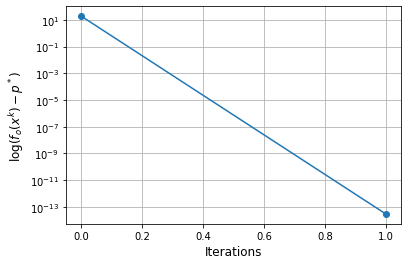

In [15]:
plt.yscale('log')
plt.plot(np.arange(Err_plot.size),Err_plot,'o-')
plt.ylabel('$\log(f_o(x^k)-p^*)$',size=12)
plt.xlabel('Iterations',size=12)
plt.grid()
plt.show()

2) El método de descenso en gradiente es altamente sensible a la forma de las curvas de nivel de la función objetivo $f_o$. Para visualizar esto considérese el problema: $$\min \frac{1}{2}\left(x_1^2+Cx_2^2 \right)$$

**Descenso en gradiente para caso $C=10$**

In [16]:
cte=10

In [17]:
fo = lambda x: 1/2*(x[0]**2+cte*x[1]**2)
x_ast=np.array([0,0],dtype=float)
x_0 = np.array([0.5,0.5],dtype=float)
tol=1e-8
tol_backtracking=1e-14
maxiter=50
p_ast=fo(x_ast)
[x,total_of_iterations,Err_plot,x_plot]=gradient_descent(fo, x_0, tol, tol_backtracking, x_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search
0    5.02e+00    7.07e-01    1.38e+00     ---
1    1.32e+00    4.55e-01    1.74e-01     1.25e-01
2    4.94e-01    3.84e-01    7.82e-02     1.25e-01
3    5.50e-01    2.91e-01    5.22e-02     2.50e-01
4    2.77e-01    2.51e-01    3.22e-02     1.25e-01
5    4.85e-01    1.34e-01    1.89e-02     5.00e-01
6    1.61e-01    1.11e-01    6.73e-03     1.25e-01
7    1.94e-01    8.43e-02    4.94e-03     2.50e-01
8    8.45e-02    7.23e-02    2.70e-03     1.25e-01
9    8.53e-02    5.45e-02    1.68e-03     2.50e-01
10    1.07e-01    4.18e-02    1.31e-03     2.50e-01
11    4.33e-02    3.56e-02    6.61e-04     1.25e-01
12    4.56e-02    2.69e-02    4.23e-04     2.50e-01
13    2.51e-02    2.33e-02    2.76e-04     1.25e-01
14    3.89e-02    1.22e-02    1.37e-04     5.00e-01
15    1.38e-02    1.02e-02    5.62e-05     1.25e-01
16    1.59e-02    7.77e-03    3.89e-05     2.50e-01
17    7.54e-03    6.70e-03    2.30e-05     1.25e-01
18    1.43e-02    3.62e-

In [18]:
x

array([ 5.90613861e-07, -1.19699510e-07])

In [19]:
total_of_iterations

50

In [20]:
Err_plot.shape

(50,)

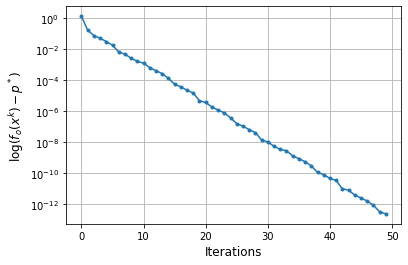

In [21]:
plt.yscale('log')
plt.plot(np.arange(Err_plot.size),Err_plot,'.-')
plt.ylabel('$\log(f_o(x^k)-p^*)$',size=12)
plt.xlabel('Iterations',size=12)
plt.grid()
plt.show()

In [22]:
x_plot[:,0]

array([0.5, 0.5])

In [23]:
x_plot.shape

(2, 50)

In [24]:
x_plot[:,-1]

array([ 5.90613861e-07, -1.19699510e-07])

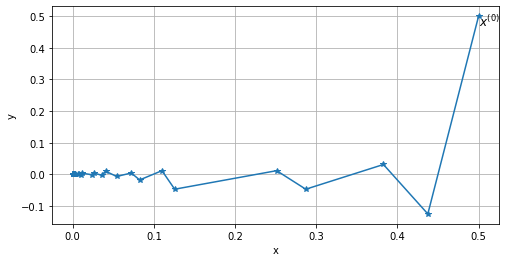

In [25]:
plt.figure(figsize=(8,4))
plt.plot(x_plot[0,:],x_plot[1,:],'-*')
plt.ylabel('y')
plt.xlabel('x')
plt.annotate('$x^{(0)}$',(x_plot[0,0],x_plot[1,0]),fontsize=12,xytext=(0.5, 0.47))
plt.grid()
plt.show()

**Curvas de nivel de $f_o$**

In [26]:
cte=10

In [27]:
z=lambda x_mesh,y_mesh,cte: 1/2*(x_mesh**2+cte*y_mesh**2)

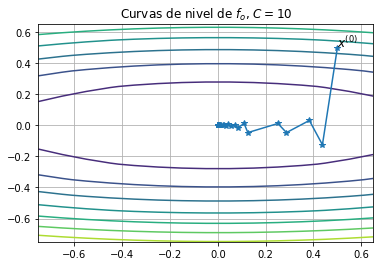

In [28]:
density=1e-1
xl=-.75
yl=-.75
xr=.75
yr=.75
x_p=np.arange(xl,xr,density)
y_p=np.arange(yl,yr,density)
x_mesh,y_mesh = np.meshgrid(x_p,y_p)
plt.contour(x_p,y_p,z(x_mesh,y_mesh,cte))
plt.plot(x_plot[0,:],x_plot[1,:],'-*')
plt.annotate('$x^{(0)}$',(x_plot[0,0],x_plot[1,0]),fontsize=12)
plt.grid()
plt.title("Curvas de nivel de $f_o$, $C=10$")
plt.show()

**Curvas de nivel $C=1$**

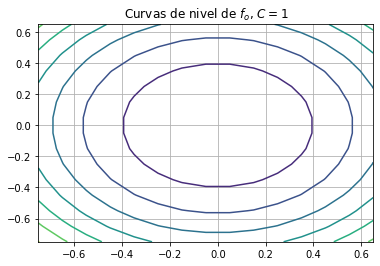

In [29]:
cte=1
plt.contour(x_p,y_p,z(x_mesh,y_mesh,cte))
plt.grid()
plt.title("Curvas de nivel de $f_o$, $C=1$")
plt.show()

**Curvas de nivel $C=0.1$**

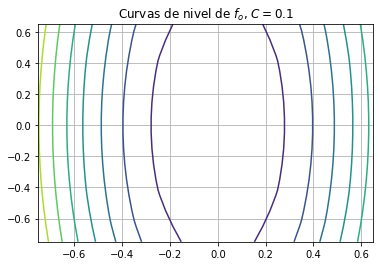

In [30]:
cte=.1
plt.contour(x_p,y_p,z(x_mesh,y_mesh,cte))
plt.grid()
plt.title("Curvas de nivel de $f_o$, $C=0.1$")
plt.show()

Se puede probar que las curvas de nivel para $f_o$ bajo las suposiciones que están al inicio de esta nota tienen forma de elipsoides cerca del óptimo $x^*$ y son aproximadamente iguales al elipsoide definido como:

$$\mathcal{E} = \{z \in \mathbb{R}^2 | ||z-x^*||_{\nabla^2 f_o(x^*)}^2 \leq 1\}$$

\*La norma $||z||_P$ se nombra **norma cuadrática** y está definida para matrices simétricas positivas definidas $P$. La definición es: $$||z||_P = \sqrt{z^TPz}.$$

Obsérvese que $f_o(x)=\frac{1}{2}\left(x_1^2+Cx_2^2 \right)$ tiene una Hessiana igual a: $\nabla^2f(x)=\left [\begin{array}{cc}
1 & 0\\
0 & C\\
\end{array}
\right]
$ $\forall x \in \mathbb{R}^2$.

Por ejemplo se presenta el elipsoide $\mathcal{E}_{x^{(k)}}=\{z \in \mathbb{R}^2 | ||z-x^{(k)}||_{\nabla^2 f_o(x^{(k)})}^2 \leq 1\}$ para la última iteración $x^{(k)}$ de los resultados anteriores usando $C=10$:




In [31]:
cte=10

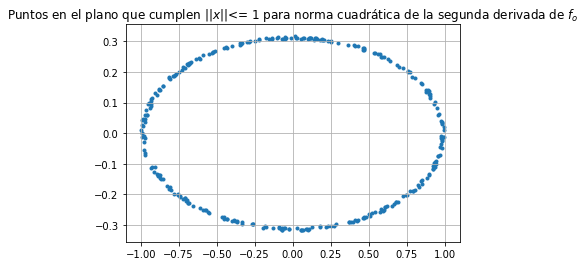

In [32]:
x_k = x_plot[:,-1].reshape(2,1)
Hf_x_k = Hessian_approximation(fo,x_k)
norm_cuad = lambda z : np.sum((z-x_k)*(Hf_x_k@(z-x_k)),axis=0)
density_p=int(2.5*10**4)
z_p=np.random.uniform(-1,1,(2,density_p))
lim_sup=1
lim_inf=.95
ind=(norm_cuad(z_p)<=lim_sup) & (lim_inf<=norm_cuad(z_p))
z_p_subset = z_p[:,ind]
plt.scatter(z_p_subset[0,:],z_p_subset[1,:],marker='.')
plt.title('Puntos en el plano que cumplen $||x||$<= 1 para norma cuadrática de la segunda derivada de $f_o$')
plt.grid()
plt.show()

In [33]:
np.linalg.cond(Hf_x_k)

10.0

In [34]:
eigenvalues, eigenvectors = np.linalg.eig(Hf_x_k)

In [35]:
(eigenvalues, eigenvectors)

(array([ 1., 10.]), array([[ 1.00000000e+00, -2.24387102e-17],
        [ 0.00000000e+00,  1.00000000e+00]]))

In [36]:
u,s,vt=np.linalg.svd(Hf_x_k)

In [37]:
(u,s,vt)

(array([[ 2.01948392e-16, -1.00000000e+00],
        [ 1.00000000e+00,  2.01948392e-16]]),
 array([10.,  1.]),
 array([[ 0.,  1.],
        [-1., -0.]]))

In [38]:
A=np.array([[1,2],
             [0,2]])

In [39]:
u,s,vt=np.linalg.svd(A)

In [40]:
(u,s,vt)

(array([[ 0.74967818, -0.66180256],
        [ 0.66180256,  0.74967818]]),
 array([2.92080963, 0.68474165]),
 array([[ 0.25666794,  0.96649965],
        [-0.96649965,  0.25666794]]))

**Descenso en gradiente para caso $C=1$**

In [41]:
cte=1;
fo = lambda x: 1/2*(x[0]**2+cte*x[1]**2)
x_ast=np.array([0,0],dtype=float)
x_0 = np.array([0.5,0.5],dtype=float)
tol=1e-8
tol_backtracking=1e-14
maxiter=50
p_ast=fo(x_ast)
[x,total_of_iterations,Err_plot,x_plot]=gradient_descent(fo, x_0, tol, tol_backtracking, x_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search
0    7.07e-01    7.07e-01    2.50e-01     ---
1    4.33e-09    1.14e-08    6.50e-17     1.00e+00
Error of x with respect to x_ast: 1.14e-08
Approximate solution: [-8.06349476e-09 -8.06349476e-09]


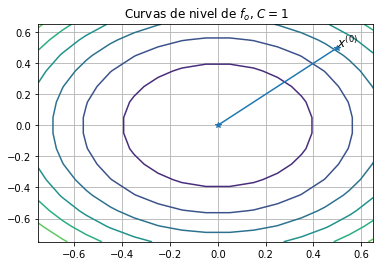

In [42]:
cte=1
plt.contour(x_p,y_p,z(x_mesh,y_mesh,cte))
plt.plot(x_plot[0,:],x_plot[1,:],'-*')
plt.annotate('$x^{(0)}$',(x_plot[0,0],x_plot[1,0]),fontsize=12)
plt.title("Curvas de nivel de $f_o$, $C=1$")
plt.grid()
plt.show()

In [43]:
cte=1

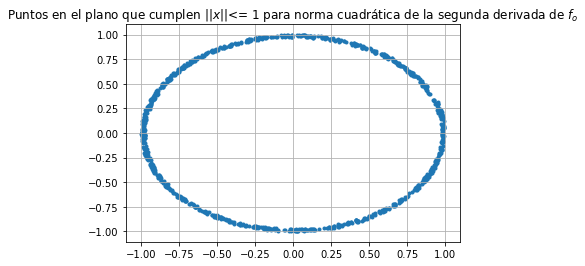

In [44]:
x_k = x_plot[:,-1].reshape(2,1)
Hf_x_k = Hessian_approximation(fo,x_k)
norm_cuad = lambda z : np.sum((z-x_k)*(Hf_x_k@(z-x_k)),axis=0)
density_p=int(2.5*10**4)
z_p=np.random.uniform(-1,1,(2,density_p))
lim_sup=1
lim_inf=.95
ind=(norm_cuad(z_p)<=lim_sup) & (lim_inf<=norm_cuad(z_p))
z_p_subset = z_p[:,ind]
plt.scatter(z_p_subset[0,:],z_p_subset[1,:],marker='.')
plt.title('Puntos en el plano que cumplen $||x||$<= 1 para norma cuadrática de la segunda derivada de $f_o$')
plt.grid()
plt.show()

In [45]:
np.linalg.cond(Hf_x_k)

1.0

**Descenso en gradiente para caso $C=0.1$**

In [46]:
cte=.1;
fo = lambda x: 1/2*(x[0]**2+cte*x[1]**2)
x_ast=np.array([0,0],dtype=float)
x_0 = np.array([0.5,0.5],dtype=float)
tol=1e-8
tol_backtracking=1e-14
maxiter=70
p_ast=fo(x_ast)
[x,total_of_iterations,Err_plot,x_plot]=gradient_descent(fo, x_0, tol, tol_backtracking, x_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search
0    5.02e-01    7.07e-01    1.38e-01     ---
1    4.50e-02    4.50e-01    1.01e-02     1.00e+00
2    4.05e-02    4.05e-01    8.20e-03     1.00e+00
3    3.65e-02    3.65e-01    6.64e-03     1.00e+00
4    3.28e-02    3.28e-01    5.38e-03     1.00e+00
5    2.95e-02    2.95e-01    4.36e-03     1.00e+00
6    2.66e-02    2.66e-01    3.53e-03     1.00e+00
7    2.39e-02    2.39e-01    2.86e-03     1.00e+00
8    2.15e-02    2.15e-01    2.32e-03     1.00e+00
9    1.94e-02    1.94e-01    1.88e-03     1.00e+00
10    1.74e-02    1.74e-01    1.52e-03     1.00e+00
11    1.57e-02    1.57e-01    1.23e-03     1.00e+00
12    1.41e-02    1.41e-01    9.97e-04     1.00e+00
13    1.27e-02    1.27e-01    8.08e-04     1.00e+00
14    1.14e-02    1.14e-01    6.54e-04     1.00e+00
15    1.03e-02    1.03e-01    5.30e-04     1.00e+00
16    9.27e-03    9.27e-02    4.29e-04     1.00e+00
17    8.34e-03    8.34e-02    3.48e-04     1.00e+00
18    7.50e-03    7.50e-

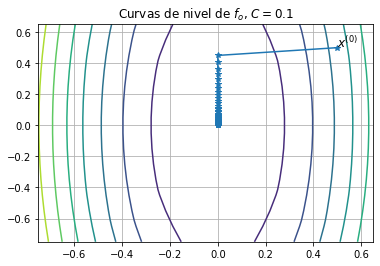

In [47]:
cte=.1
plt.contour(x_p,y_p,z(x_mesh,y_mesh,cte))
plt.plot(x_plot[0,:],x_plot[1,:],'-*')
plt.annotate('$x^{(0)}$',(x_plot[0,0],x_plot[1,0]),fontsize=12)
plt.title("Curvas de nivel de $f_o$, $C=0.1$")
plt.grid()
plt.show()

In [48]:
cte=.1

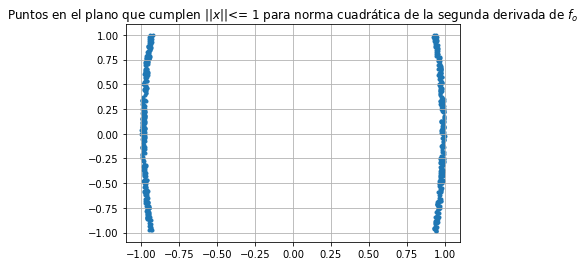

In [49]:
x_k = x_plot[:,-1].reshape(2,1)
Hf_x_k = Hessian_approximation(fo,x_k)
norm_cuad = lambda z : np.sum((z-x_k)*(Hf_x_k@(z-x_k)),axis=0)
density_p=int(2.5*10**4)
z_p=np.random.uniform(-1,1,(2,density_p))
lim_sup=1
lim_inf=.95
ind=(norm_cuad(z_p)<=lim_sup) & (lim_inf<=norm_cuad(z_p))
z_p_subset = z_p[:,ind]
plt.scatter(z_p_subset[0,:],z_p_subset[1,:],marker='.')
plt.title('Puntos en el plano que cumplen $||x||$<= 1 para norma cuadrática de la segunda derivada de $f_o$')
plt.grid()
plt.show()

In [50]:
np.linalg.cond(Hf_x_k)

10.000000000033086

**Referencias:**

* S. P. Boyd, L. Vandenberghe, Convex Optimization, Cambridge University Press, 2009.
